In [1]:
from skimage import io
import numpy as np
import os
import scanpy as sc
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
import gzip
import numpy as np
import celltypist
from celltypist import models


plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# Define the path to the saved .h5ad file
pathout = "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out"
file_path = os.path.join(pathout, 'leiden0.5_rank_16um.h5ad')

# Load the .h5ad file
andata016 = sc.read(file_path)
andata016

AnnData object with n_obs × n_vars = 97163 × 13964
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'clusters', 'dea_clusters', 'hvg', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Text(0.5, 1.0, 'Leiden Clustering (resolution=0.5)')

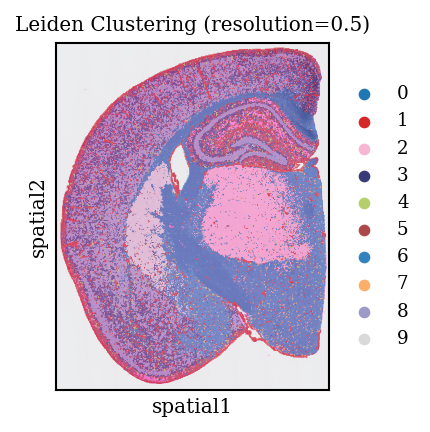

In [3]:
from matplotlib.colors import ListedColormap

# Combine multiple palettes to create a larger custom palette
palette = sns.color_palette("tab20") + sns.color_palette("tab20b") + sns.color_palette("tab20c")

# Convert the combined palette to a ListedColormap
listed_cmap = ListedColormap(palette)

sns.set_context("paper", font_scale=1)

resolutions = [0.1, 0.5, 1.0, 2.0]

res = resolutions[1]

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sc.tl.leiden(andata016, key_added=f'clusters_res_{res}', flavor="igraph", directed=False, resolution=res, n_iterations=2)
sq.pl.spatial_scatter(andata016, color=f'clusters_res_{res}', ax=ax, palette=listed_cmap)
ax.set_title(f'Leiden Clustering (resolution={res})')

In [4]:
sq.gr.spatial_neighbors(andata016, coord_type="generic", spatial_key="spatial")
sq.gr.nhood_enrichment(andata016, cluster_key="clusters")

  0%|          | 0/1000 [00:00<?, ?/s]

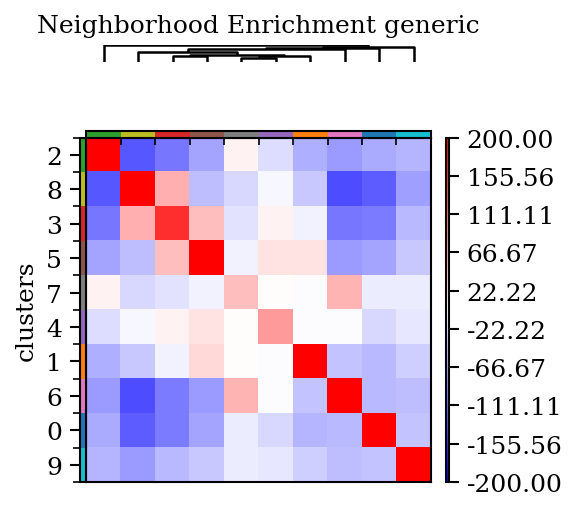

In [8]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]  # Blue -> White -> Red
n_bins = 100  # Discretize into 100 bins
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)

plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

sq.pl.nhood_enrichment(
    andata016,
    title = "Neighborhood Enrichment generic",
    cluster_key="clusters",
    method="average",
    cmap=custom_cmap,
    vmin=-200,
    vmax=200,
    figsize=(3, 3),
)


In [9]:
sq.gr.spatial_neighbors(andata016,coord_type="grid", n_neighs=6, n_rings=8, key_added='spatial_neighbors')
sq.gr.nhood_enrichment(andata016, cluster_key="clusters")

with PdfPages(os.path.join(pathout, f'nhood_enrichment_grid_6_8_16um.pdf')) as pdf:
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    fig, ax = plt.subplots()  # Increase figure size

    sq.pl.nhood_enrichment(
        andata016,
        title = "Neighborhood Enrichment grid",
        cluster_key="clusters",
        method="average",
        cmap=custom_cmap,
        vmin=-200,
        vmax=200,
        ax = ax
        )

    fig.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Adjust subplot parameters

    pdf.savefig(fig)
    plt.close()

  0%|          | 0/1000 [00:00<?, ?/s]

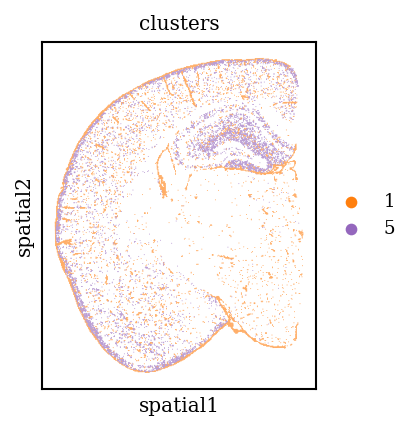

In [5]:
from matplotlib.colors import ListedColormap

# Combine multiple palettes to create a larger custom palette
palette = sns.color_palette("tab20") + sns.color_palette("tab20b") + sns.color_palette("tab20c")

# Convert the combined palette to a ListedColormap
listed_cmap = ListedColormap([palette[2],palette[8]])

sns.set_context("paper", font_scale=1)

resolutions = [0.1, 0.5, 1.0, 2.0]

res = resolutions[1]

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sel_cluters = ['1','5']
sq.pl.spatial_scatter(andata016, groups=sel_cluters, color="clusters",img=False, ax=ax, palette=listed_cmap)


<center><h3> Co-occurrence across spatial dimensions

Beyond the neighbor enrichment score, we can also visualize cluster co-occurrence in spatial dimensions. This analysis is similar to the one mentioned earlier but operates on the original spatial coordinates instead of the connectivity matrix. The co-occurrence score is defined as:
$
\frac{p(\text{exp}|\text{cond})}{p(\text{exp})}
$

where $ p(\text{exp}|\text{cond}) $ is the conditional probability of observing a cluster conditioned on the presence of another cluster, and $ p(\text{exp}) $ is the probability of observing the cluster within the radius of interest. The score is computed across increasing radii around each observation (i.e., spots) in the tissue.

We will compute this score using `squidpy.gr.co_occurrence()` and set the cluster annotation for the conditional probability with the `clusters` argument. The results will be visualized using `squidpy.pl.co_occurrence()`.


In [6]:
sq.gr.co_occurrence(andata016, cluster_key="clusters")

  0%|          | 0/1176 [00:00<?, ?/s]

Text(0, 0.5, 'co-occurrence ratio')

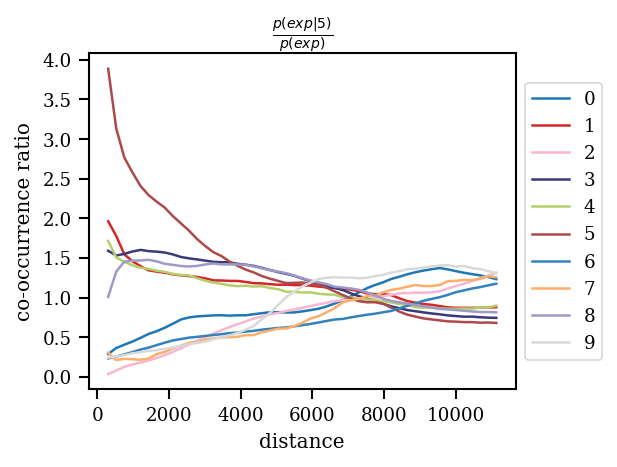

In [16]:
palette = sns.color_palette("tab20") + sns.color_palette("tab20b") + sns.color_palette("tab20c")
listed_cmap = ListedColormap(palette)


sq.pl.co_occurrence(
    andata016,
    cluster_key="clusters",
    clusters='5',
    figsize=(4, 3),
    palette = listed_cmap
)
plt.ylabel("co-occurrence ratio")

<center><h3> Autocorrelation: Moran’s I Score

Previously, we primarily focused on the distribution of cell clusters within the tissue. However, Squidpy also allows us to examine the spatial distributions of genes expressed in the tissue.

In this example, we use Squidpy to compute Moran’s I global spatial auto-correlation statistic, which helps identify genes with non-random distribution in the tissue. We'll visualize the top and bottom 20 genes to showcase examples of genes with high and low auto-correlation.



In [53]:
sq.gr.spatial_autocorr(andata016, mode="moran")
num_view = 4
top_autocorr = (
    andata016.uns["moranI"]["I"].sort_values(ascending=False).head(num_view).index.tolist()
)
bot_autocorr = (
    andata016.uns["moranI"]["I"].sort_values(ascending=True).head(num_view).index.tolist()
)

In [48]:
top_autocorr = ['Mbp','Prkcd','Nrgn','Fth1']

<center><h3> Genes with high spatial autocorrelation

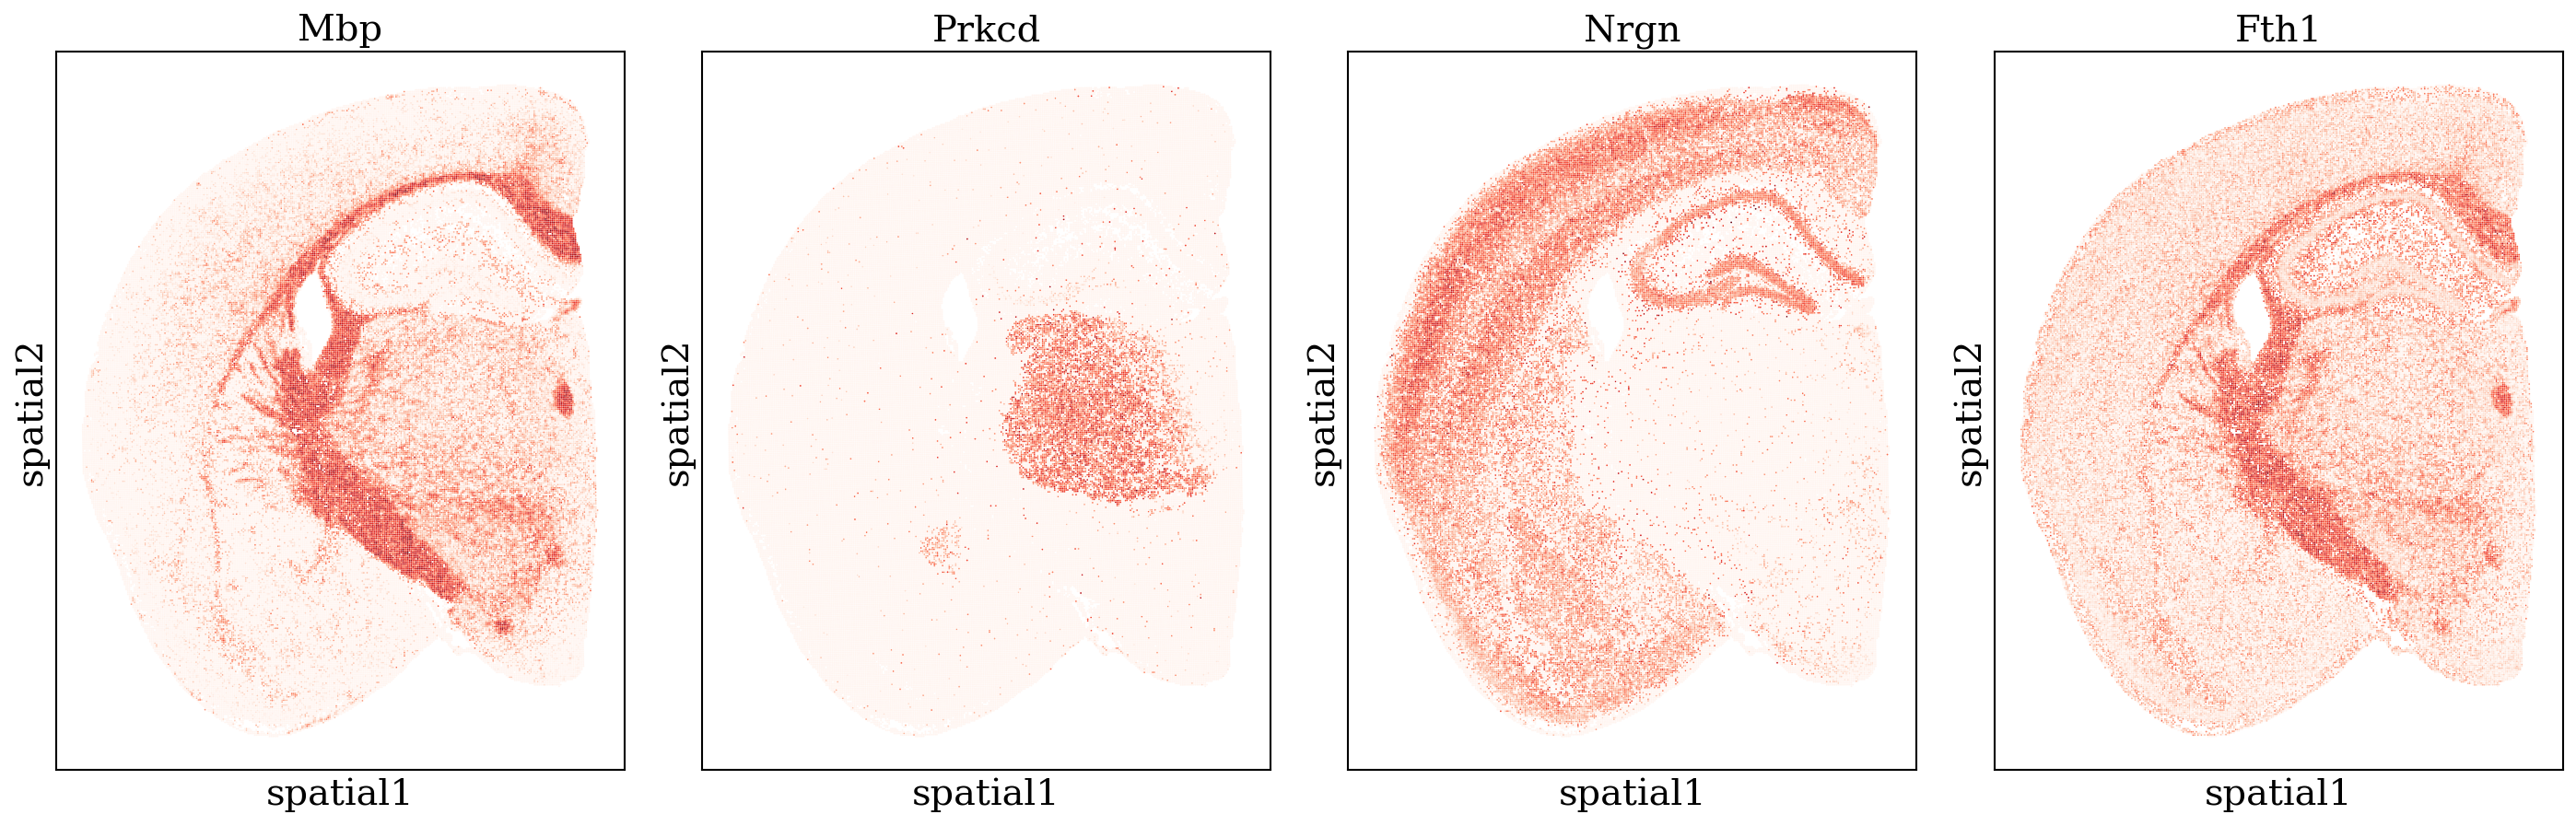

In [52]:
sns.set_context("paper", font_scale=2)


sq.pl.spatial_scatter(
    andata016, color=top_autocorr, size=1, cmap="Reds", img=False, figsize=(5, 18),colorbar=False
)
plt.subplots_adjust(wspace=0.3)

plt.show()

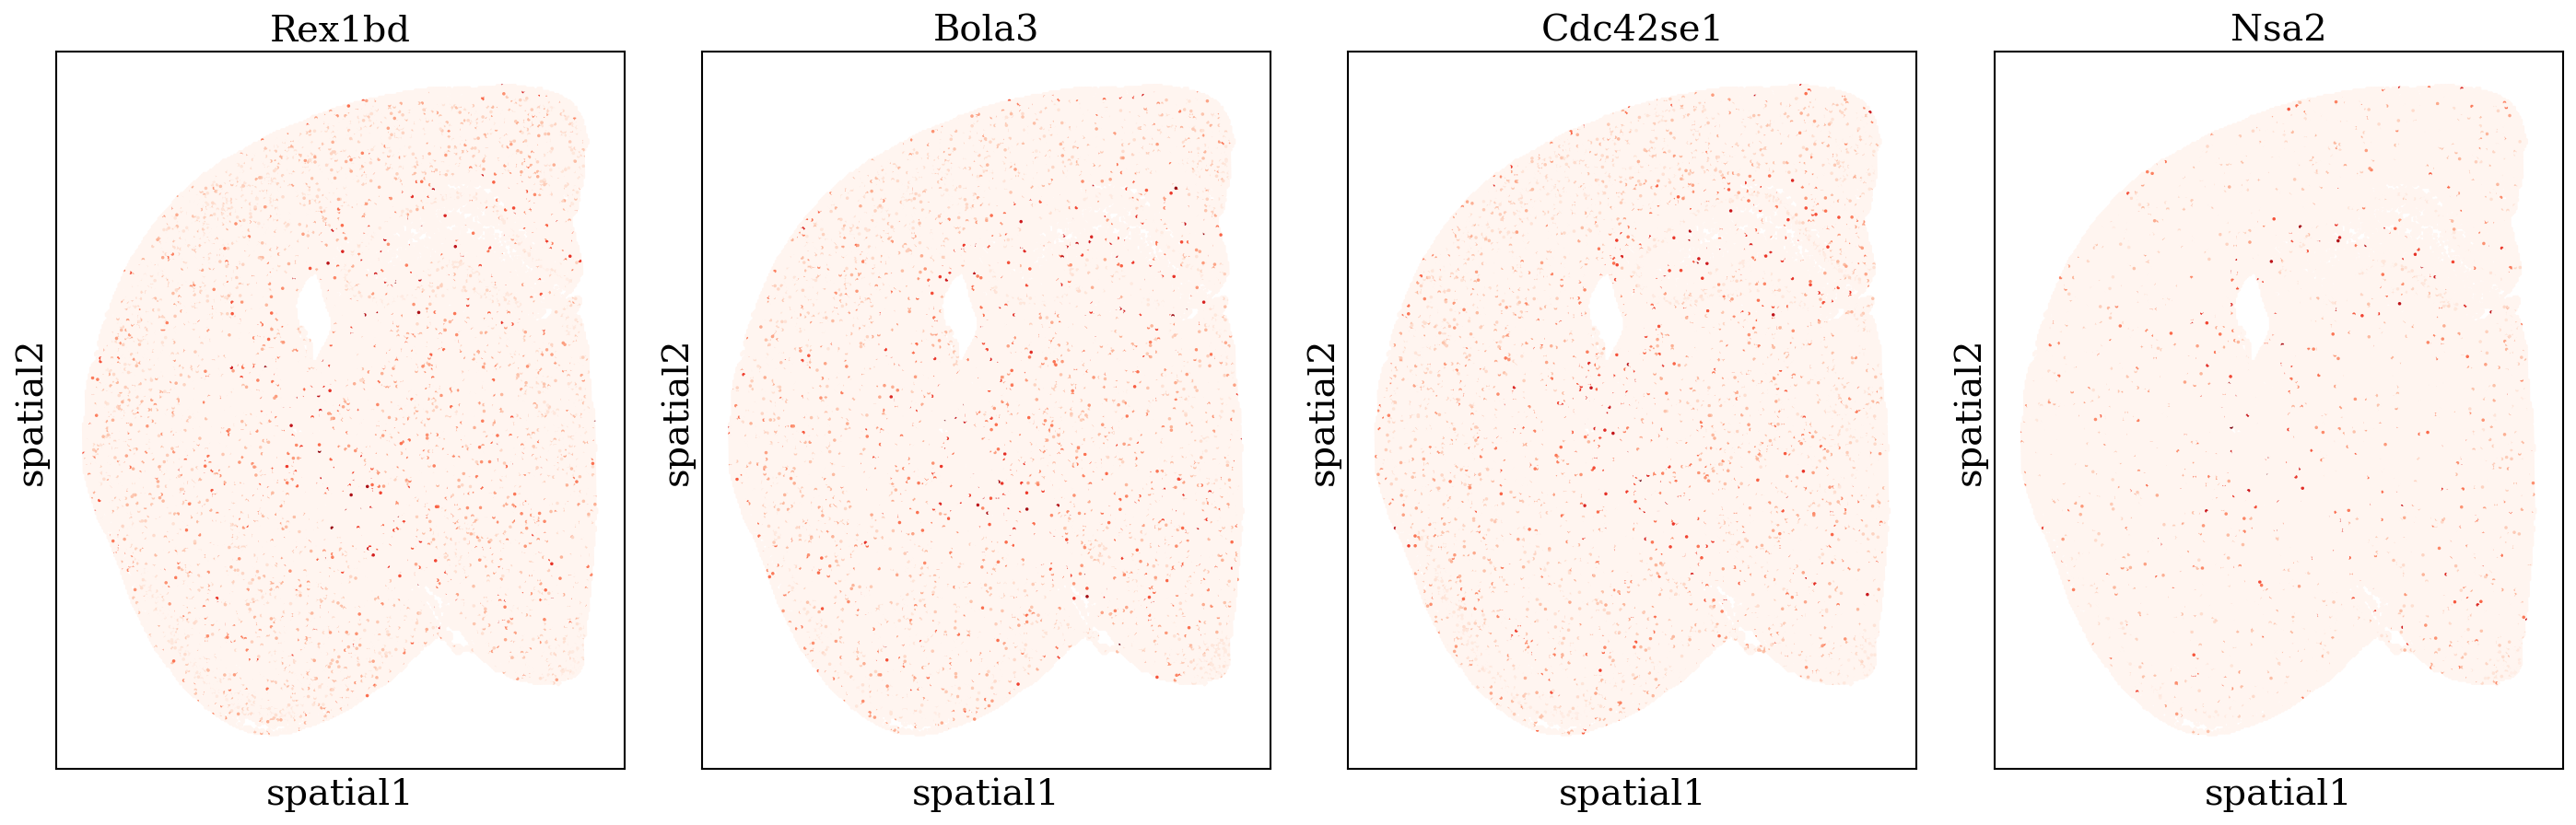

In [55]:
sns.set_context("paper", font_scale=2)


sq.pl.spatial_scatter(
    andata016, color=bot_autocorr, size=2, cmap="Reds", img=False, figsize=(5, 18),colorbar=False
)
plt.subplots_adjust(wspace=0.3)

plt.show()

<center><h3> Ligand-receptor interaction analysis

We are continuing the analysis by showcasing several feature-level methods that are highly relevant for the analysis of spatial molecular data. For example, after quantifying cluster co-occurrence, we might be interested in identifying molecular instances that could potentially drive cellular communication. This naturally leads to a ligand-receptor interaction analysis. In Squidpy, we provide a fast re-implementation of the popular method CellPhoneDB [Efremova et al., 2020] (code available at https://github.com/Teichlab/cellphonedb) and have extended its database of annotated ligand-receptor interaction pairs with the popular database Omnipath [Türei et al., 2016]. You can run the analysis for all cluster pairs and all genes (in seconds, without leaving this notebook) using squidpy.gr.ligrec(). Furthermore, we’ll directly visualize the results, filtering out lowly-expressed genes (with the means_range argument) and increasing the threshold for the adjusted p-value (with the alpha argument). We’ll also subset the visualization to only include one source group, the Hippocampus cluster, and two target groups, the Pyramidal_layer_dentate_gyrus and Pyramidal_layer clusters.

From squidpy paer:
"e, Ligand–receptor interactions from the cluster ‘Hippocampus’ to clusters ‘Pyramidal layer’ and ‘Pyramidal layer dentate gyrus’. Shown are a subset of significant ligand–receptor pairs queried using the Omnipath database. Shown ligand–receptor pairs were filtered for visualization purposes, based on expression (mean expression > 13) and significant after false discovery rate (FDR) correction (P < 0.01). P values results from a permutation-based test with 1,000 permutations and were adjusted with the Benjamini–Hochberg method."

In [19]:
from skimage import io
import numpy as np
import os
import scanpy as sc
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
import gzip
import numpy as np
import celltypist
from celltypist import models

# Define the path to the saved .h5ad file
pathout = "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out"
file_path = os.path.join(pathout, 'leiden0.5_rank_16um.h5ad')

# Load the .h5ad file
andata016 = sc.read(file_path)
andata016
sc.tl.leiden(andata016, key_added=f'clusters', flavor="igraph", directed=False, resolution=0.5, n_iterations=2)

sq.gr.ligrec(
    andata016,
    n_perms=100,
    cluster_key="clusters",
    use_raw=False,
    complex_policy = "min",
    clusters = ("1","5"),
    show_progress_bar = True
)

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/squidpy/gr/_ligrec.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters"] = data["clusters"].cat.remove_unused_categories()
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/squidpy/gr/_ligrec.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters"] = cat.rename_categories(cluster_mapper)


  0%|          | 0/100 [00:00<?, ?permutation/s]

In [10]:
df = andata016.uns['clusters_ligrec']['pvalues']

In [12]:
df.columns

MultiIndex([('1', '1'),
            ('1', '5'),
            ('5', '1'),
            ('5', '5')],
           names=['cluster_1', 'cluster_2'])

In [15]:
df.isna().all().all()

True

In [18]:
sq.pl.ligrec(
    andata016,
    cluster_key="clusters",
    source_groups="1",
    target_groups=["5"],
    means_range=(3, np.inf),
    alpha=1e-4,
    swap_axes=True,
)

ValueError: After removing rows with only NaN interactions, none remain.